# cdasws Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to access data from [cdaweb](https://cdaweb.gsfc.nasa.gov) with the data returned in the [SpacePy data model](https://spacepy.github.io/datamodel.html).  Alternatively, it is possible to have the data returned in an [xarray.Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html).  For xarray.Dataset results, see this [notebook](CdasWsExampleXarray.html) ([ipynb file](CdasWsExampleXarray.ipynb)).  This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
2. [Setup](#Setup)
3. [Get Datasets](#Get-Datasets)
4. [Get Dataset Variables](#Get-Dataset-Variables)
5. [Get Data](#Get-Data)
6. [Display Metadata](#Display-Metadata)
7. [Plot Values](#Plot-Values)
8. [Binning Example](#Binning-Example)
9. [DOI Example](#DOI-Example)
10. [Additional Documentation](#Additional-Documentation)

## Prerequisites
Install the prerequisite software the [Python Package Index](https://pypi.org/).

1. pip install spacepy
1. pip install cdasws

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [24]:
from cdasws import CdasWs
import matplotlib.pyplot as plt
cdas = CdasWs()

## Get Datasets
The following code demontrates how to get a list of datasets.

In [25]:
datasets = cdas.get_datasets(observatoryGroup='ACE',
                             instrumentType='Magnetic Fields (space)')
for index, dataset in enumerate(datasets):
    print(dataset['Id'], dataset['Label'])
    if index == 5:
        print('...')
        break

AC_AT_DEF ACE Hourly RTN, GSE and J2000 GCI Attitude direction cosines - E. C. Stone (California Institute of Technology)
AC_H0_MFI H0 - ACE Magnetic Field 16-Second Level 2 Data - N. Ness (Bartol Research Institute)
AC_H1_MFI H1 - ACE Magnetic Field 4-Minute Level 2 Data - N. Ness (Bartol Research Institute)
AC_H2_MFI H2 - ACE Magnetic Field 1-Hour Level 2 Data - N. Ness (Bartol Research Institute)
AC_H3_MFI H3 - ACE Magnetic Field 1-Second Level 2 Data - N. Ness (Bartol Research Institute)
AC_K0_GIFWALK Links to ACE KP pre-generated survey and other plots - Polar-Wind-Geotail Ground System (NASA GSFC)
...


## Get Dataset Variables
The following code demonstrates how to get a dataset's variables.

In [26]:
variables = cdas.get_variables('AC_H1_MFI')
for variable in variables:
    print(variable['Name'], variable['LongDescription'])

Magnitude B-field magnitude
BGSEc Magnetic Field Vector in GSE Cartesian coordinates (4 min)
BGSM Magnetic field vector in GSM coordinates (4 min)
SC_pos_GSE ACE s/c position, 3 comp. in GSE coord.
SC_pos_GSM ACE s/c position, 3 comp. in GSM coord.


## Get Data
The following code demonstrates how to access magnetic field measurements
from the ACE [AC_H1_MFI dataset](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H1_MFI).

In [27]:
data = cdas.get_data('AC_H1_MFI', ['Magnitude', 'BGSEc'],
                     '2009-06-01T00:00:00Z', '2009-06-01T00:10:00Z')[1]
print(data)

{'Epoch': VarCopy([datetime.datetime(2009, 6, 1, 0, 0),
         datetime.datetime(2009, 6, 1, 0, 4),
         datetime.datetime(2009, 6, 1, 0, 8)], dtype=object), 'Magnitude': VarCopy([3.495, 3.474, 3.477], dtype=float32), 'BGSEc': VarCopy([[-0.106,  2.521, -2.391],
         [-0.412,  2.402, -2.449],
         [-0.094,  2.309, -2.587]], dtype=float32), 'cartesian': VarCopy(['x_component', 'y_component', 'z_component'], dtype='<U11'), 'metavar0': VarCopy(['Bx GSE', 'By GSE', 'Bz GSE'], dtype='<U6')}


## Display Metadata

The following code displays metadata for the Magnitude variable.

In [28]:
print(data['Magnitude'].attrs)

{'FIELDNAM': 'B-field magnitude', 'VALIDMIN': 0.0, 'VALIDMAX': 500.0, 'SCALEMIN': 0.0, 'SCALEMAX': 10.0, 'UNITS': 'nT', 'FORMAT': 'F8.3', 'VAR_TYPE': 'data', 'DICT_KEY': 'magnetic_field>magnitude', 'FILLVAL': -1e+31, 'DEPEND_0': 'Epoch', 'CATDESC': 'B-field magnitude', 'LABLAXIS': '<|B|>', 'DISPLAY_TYPE': 'time_series', 'DIM_SIZES': 0}


## Plot Values

The following code plots the Magnitude variable's values using the label values from the metadata.

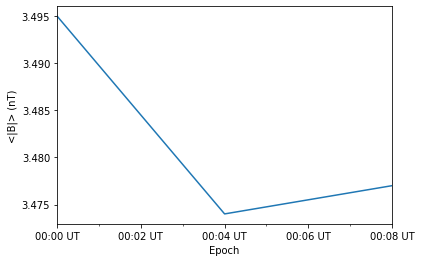

In [29]:
fig = data.plot(['Magnitude'])
fig.show()

## Binning Example
For analysis, it is often useful to place two datasets that have different timestamps on the same time grid (with optional spike removal).  The following demonstrates doing this with cdasws and the datasets [AC_H0_SWE](/misc/NotesA.html#AC_H0_SWE) and [AC_H2_SWE](/misc/NotesA.html#AC_H2_SWE).  For more information on binning, see [binning in cdaweb](/CDAWeb_Binning_readme.html).

### Display Original Data
The following code gets and displays the original, unbinned data.

In [30]:
    dataset0 = 'AC_H0_SWE'
    parameters = ['Np']
    start = '1998-02-04T00:00:00Z'
    stop = '1998-02-06T00:00:00Z'
    status, data0 = cdas.get_data(dataset0, parameters, start, stop)
    print(data0)
    dataset1 = 'AC_H2_SWE'
    status, data1 = cdas.get_data(dataset1, parameters, start, stop)
    print(data1)

{'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 31),
         datetime.datetime(1998, 2, 4, 0, 1, 35),
         datetime.datetime(1998, 2, 4, 0, 2, 39), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 19),
         datetime.datetime(1998, 2, 5, 23, 58, 23),
         datetime.datetime(1998, 2, 5, 23, 59, 27)], dtype=object), 'Np': VarCopy([-1.00000e+31, -1.00000e+31, -1.00000e+31, ...,  1.44819e+01,
          1.49483e+01,  1.35783e+01], dtype=float32)}
{'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0),
         datetime.datetime(1998, 2, 4, 1, 0),
         datetime.datetime(1998, 2, 4, 2, 0),
         datetime.datetime(1998, 2, 4, 3, 0),
         datetime.datetime(1998, 2, 4, 4, 0),
         datetime.datetime(1998, 2, 4, 5, 0),
         datetime.datetime(1998, 2, 4, 6, 0),
         datetime.datetime(1998, 2, 4, 7, 0),
         datetime.datetime(1998, 2, 4, 8, 0),
         datetime.datetime(1998, 2, 4, 9, 0),
         datetime.datetime(1998, 2, 4, 10, 0),
         datetim

### Bin Data
The following code gets data after it has been binned with 60 second time intervals and any missing values created by interpolation.

In [31]:
    binData = {
        'interval': 60.0,
        'interpolateMissingValues': True,
        'sigmaMultiplier': 4
    }
    status, data0 = cdas.get_data(dataset0, parameters, start, stop, binData=binData)
    print(data0)
    status, data1 = cdas.get_data(dataset1, parameters, start, stop, binData=binData)
    print(data1)

{'Epoch_bin': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 30),
         datetime.datetime(1998, 2, 4, 0, 1, 30),
         datetime.datetime(1998, 2, 4, 0, 2, 30), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 30),
         datetime.datetime(1998, 2, 5, 23, 58, 30),
         datetime.datetime(1998, 2, 5, 23, 59, 30)], dtype=object), 'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 31),
         datetime.datetime(1998, 2, 4, 0, 1, 35),
         datetime.datetime(1998, 2, 4, 0, 2, 39), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 19),
         datetime.datetime(1998, 2, 5, 23, 58, 23),
         datetime.datetime(1998, 2, 5, 23, 59, 27)], dtype=object), 'Np': VarCopy([16.3343, 16.3343, 16.3343, ..., 14.4819, 14.9483, 13.5783],
        dtype=float32), 'NP_NBIN': VarCopy([-0., -0., -0., ...,  1.,  1.,  1.], dtype=float32), 'NP_BIN_DELTA_MINUS_VAR': VarCopy([-1.e+31, -1.e+31, -1.e+31, ..., -1.e+31, -1.e+31, -1.e+31],
        dtype=float32), 'NP_BIN_DELTA_PLUS_VAR': VarCopy(

### Compare Data
The following code compares the binned data from the two datasets by plotting the values.

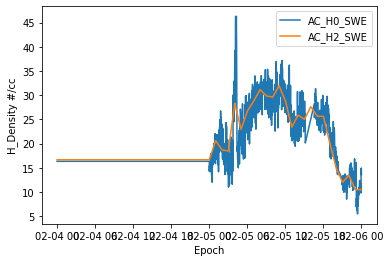

In [32]:
plt.plot(data0['Epoch_bin'], data0['Np'])
plt.plot(data1['Epoch_bin'], data1['Np'])
plt.xlabel(data0['Epoch'].attrs['LABLAXIS'])
plt.ylabel(data0['Np'].attrs['LABLAXIS'] + ' ' +
           data0['Np'].attrs['UNITS'])
plt.legend([dataset0, dataset1])
plt.show()

## DOI Example
The following code gets data from a dataset using the dataset's [digital object identifier](https://en.wikipedia.org/wiki/Digital_object_identifier) and displays the dataset's values. 

In [33]:
status, data = cdas.get_data('10.21978/P8PG8V', ['BT'], '1987-09-24T00:00:00Z', '1987-09-25T00:00:00Z')
print(data.attrs['Descriptor'])
print(data)

['MFI>3-axis fluxgate magnetometer averages']
{'Epoch': VarCopy([datetime.datetime(1987, 9, 24, 0, 30, 1, 567000),
         datetime.datetime(1987, 9, 24, 0, 30, 5, 567000),
         datetime.datetime(1987, 9, 24, 0, 30, 9, 567000), ...,
         datetime.datetime(1987, 9, 24, 23, 59, 51, 368000),
         datetime.datetime(1987, 9, 24, 23, 59, 55, 369000),
         datetime.datetime(1987, 9, 24, 23, 59, 59, 369000)], dtype=object), 'BT': VarCopy([89.8591, 89.7978, 89.7269, ..., 18.5909, 18.6276, 18.5359],
        dtype=float32)}


## Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.